In [2]:
import numpy as np # linear algebra
import pandas as pd
df = pd.read_csv('/content/spambase_csv.csv')

df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
df['class'].value_counts()

0    2788
1    1813
Name: class, dtype: int64

<Axes: >

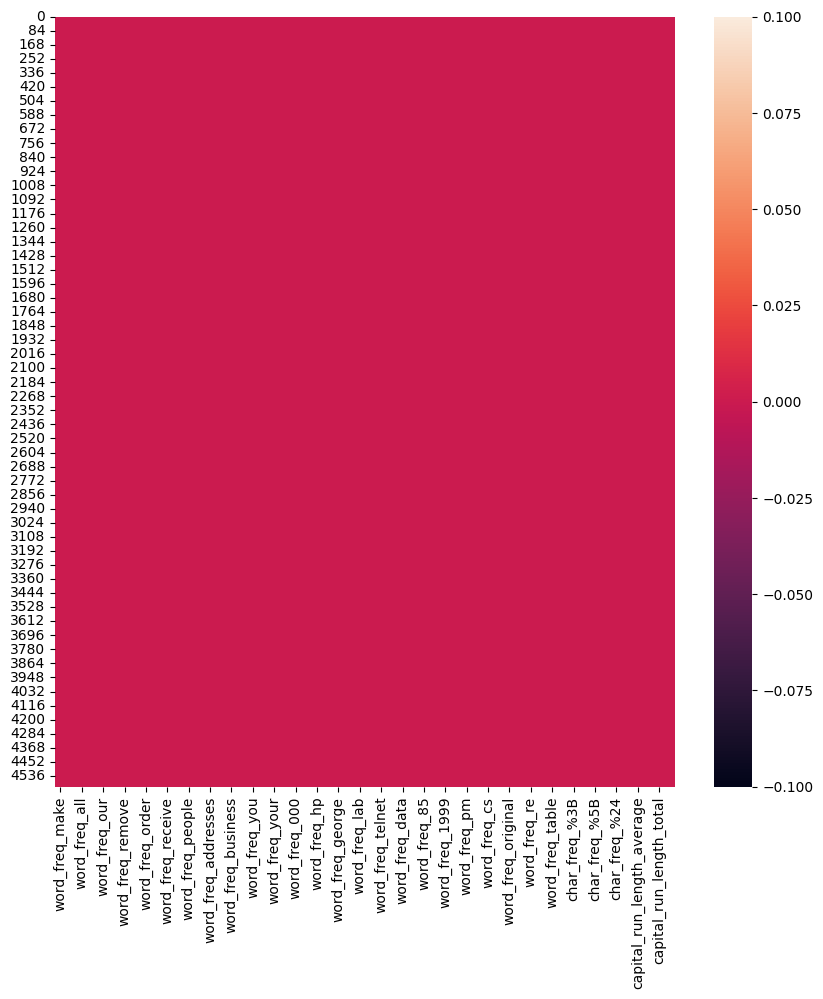

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[10,10]
sns.heatmap(df.isna())

In [5]:
X = df.iloc[:,:57]
y = df.iloc[:,-1]

In [6]:
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import LogisticRegression
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import confusion_matrix

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Accuracy: 0.8208469055374593
Confusion Matrix:
[[387 144]
 [ 21 369]]


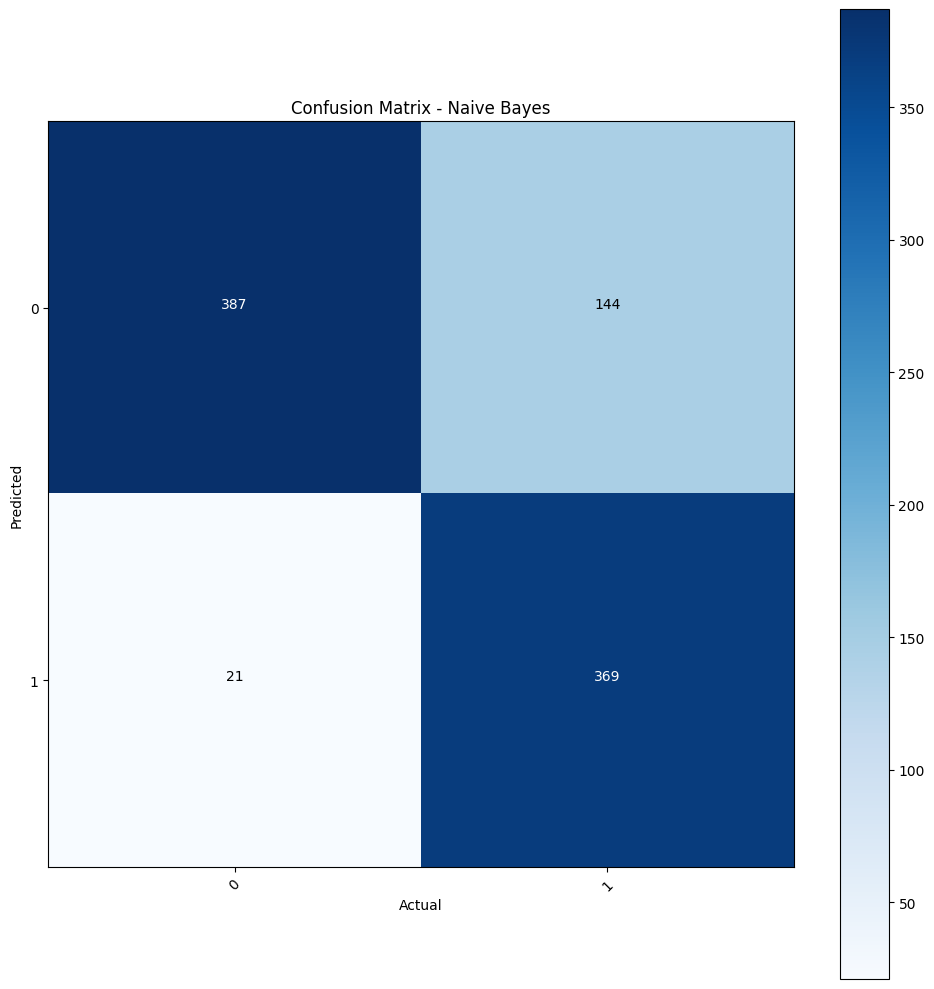

In [8]:

# Importing necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Calculate accuracy
accuracy_nb = nb_model.score(X_test, y_test)
print("Accuracy:", accuracy_nb)

# Predict on the test set
preds_nb = nb_model.predict(X_test)

# Get the unique classes present in both actual and predicted labels
classes = np.unique(np.concatenate((y_test, preds_nb)))

# Confusion matrix
cm_nb = confusion_matrix(y_test, preds_nb, labels=classes)
print("Confusion Matrix:")
print(cm_nb)

# Visualize confusion matrix
plt.figure(figsize=(10,10))
plt.imshow(cm_nb, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Naive Bayes')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Actual')
plt.ylabel('Predicted')
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(cm_nb[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm_nb[i, j] > cm_nb.max() / 2. else "black")
plt.tight_layout()
plt.show()